# Análisis Predictivo de Series Temporales

# Universidad ORT Uruguay, Marzo 2021.


# Curso: Análisis Predictivo de Series Temporales


## Docente: Andrés Ferragut


## Materiales del curso:

 * **Libro del curso**: Robert H. Shumway, David S. Stoffer, "Time Series Analysis and Its Applications (With R Examples)"
 
 * **Materiales de referencia**: Aulas de la asignatura, https://aulas.ort.edu.uy/course/view.php?id=4303
 
 * **Software**: Jupyter notebooks + R
 
     + Se pueden correr en: https://notebook-fi.facultades.ort.edu.uy/
     + Instalar local a través de [Anaconda](https://www.anaconda.com/products/individual).
     + Correr usando la Imagen Docker jupyter/r-notebooks: https://hub.docker.com/r/jupyter/r-notebook/
     + Otros sitios en línea (Google Colab, CoCalc, etc. etc.)
     
 * **Material de ejemplo** (acompañante del libro): https://www.stat.pitt.edu/stoffer/tsa4/


## Evaluación

 * **Ejercicios en clase** (30 pts): Corresponden a los ejercicios al final de cada uno de los cuadernos de clase.
 
 * **Obligatorio** (40 pts): Problema a definir con los estudiantes. En grupo. Análisis de una serie de datos usando herramientas del curso o estudio de algún modelo/algoritmo que no se haya visto en clase.
 
 * **Parcial** (30 pts): Evaluación escrita individual al final del curso.
 

**Aprobación**: Suma $\geq$ 70.

## Temario

 * Introducción
 * Regresión y análisis exploratorio de series.
 * Modelos autorregresivos y de media móvil (ARMA)
 * Modelos ARIMA (ARMA integrado) para series no estacionarias.
 * Filtrado, predicción, análisis espectral.
 * Modelos en espacio de estados.
 * Modelos de Markov escondidos.
 * ... 


# Biblioteca: astsa

Es la biblioteca de R que acompaña al libro, y tiene ejemplos de series de datos y 
### Instalación:

In [1]:
## Instalación clásica, usando Repositorio de R
#install.packages("astsa")

## Instalación directa de GitHub
#install.packages("devtools")
#devtools::install_github("nickpoison/astsa")

## Cargo la biblioteca
library(astsa)

##Ajusto tamaño de figuras
options(repr.plot.width=14, repr.plot.height=7)

## Ejemplos de series temporales

A continuación presentamos varios ejemplos de series temporales a partir de datos reales para ilustrar las preguntas que buscamos contestar con las herramientas del curso.

### Ejemplo 1: Ganancias trimestrales de Johnson & Johnson.

* 21 años de datos (84 trimestres) desde 1960 a 1980.

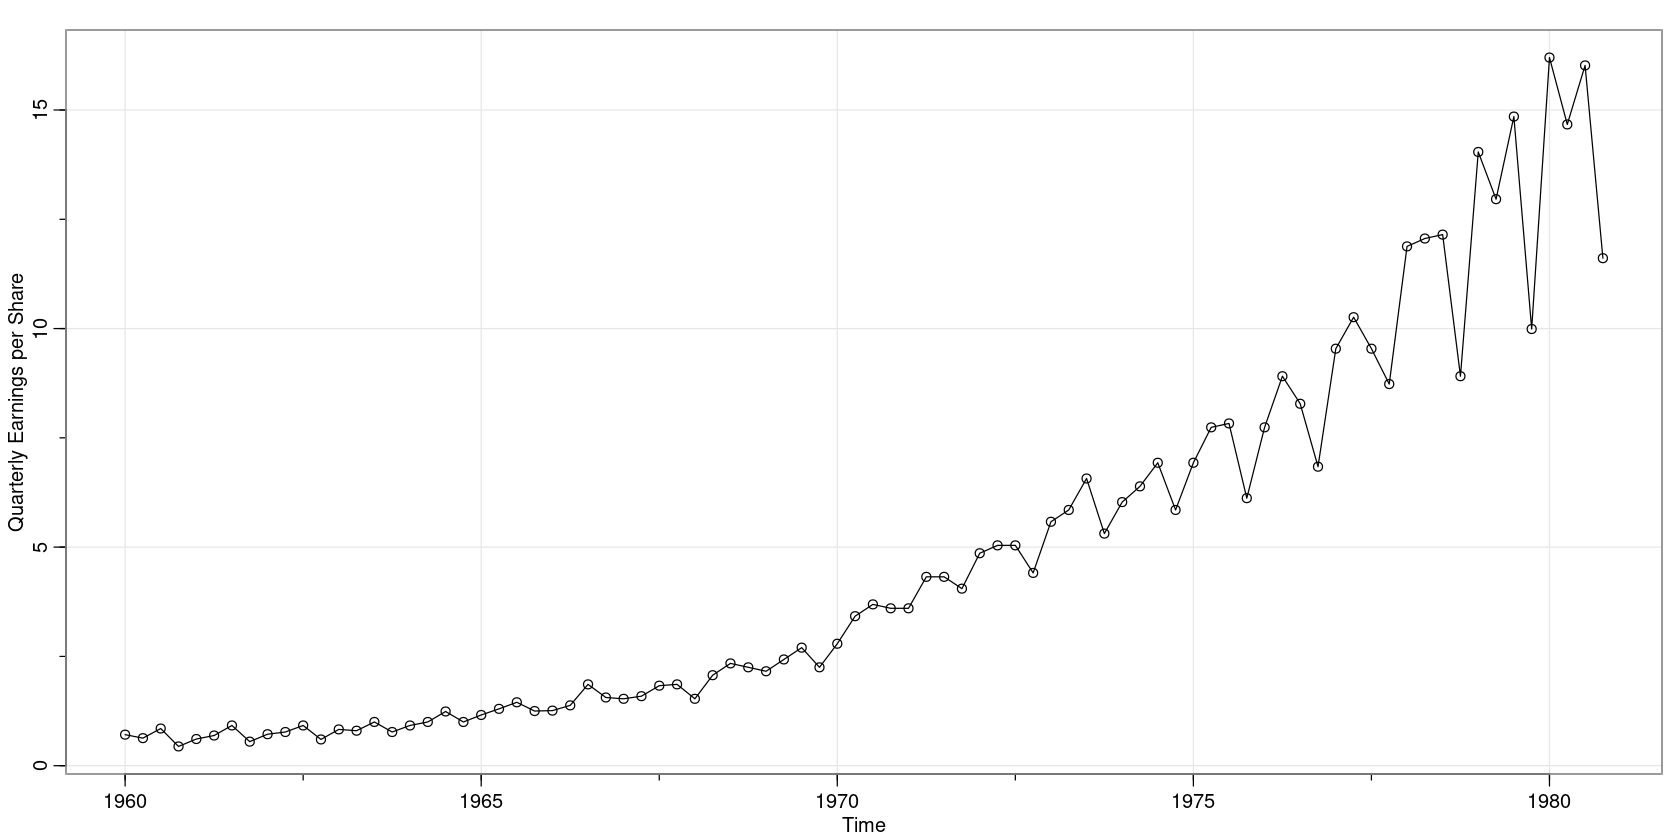

In [2]:
tsplot(jj, type="o", ylab="Quarterly Earnings per Share")

#### Observaciones

* Hay una tendencia creciente a lo largo de la serie...¿cómo la detectamos?
* Hay un comportamiento regular alrededor de dicha tendencia: cada 4 trimestres hay uno más bajo. ¿Cómo lo estimamos?
* ¿Podemos *predecir* el cuánto serán las ganancias en el futuro?

### Ejemplo 2: Calentamiento global

Serie de datos de temperaturas medias anuales de 1880 a 2009, en relación al promedio 1951-1980, en grados centigrados.

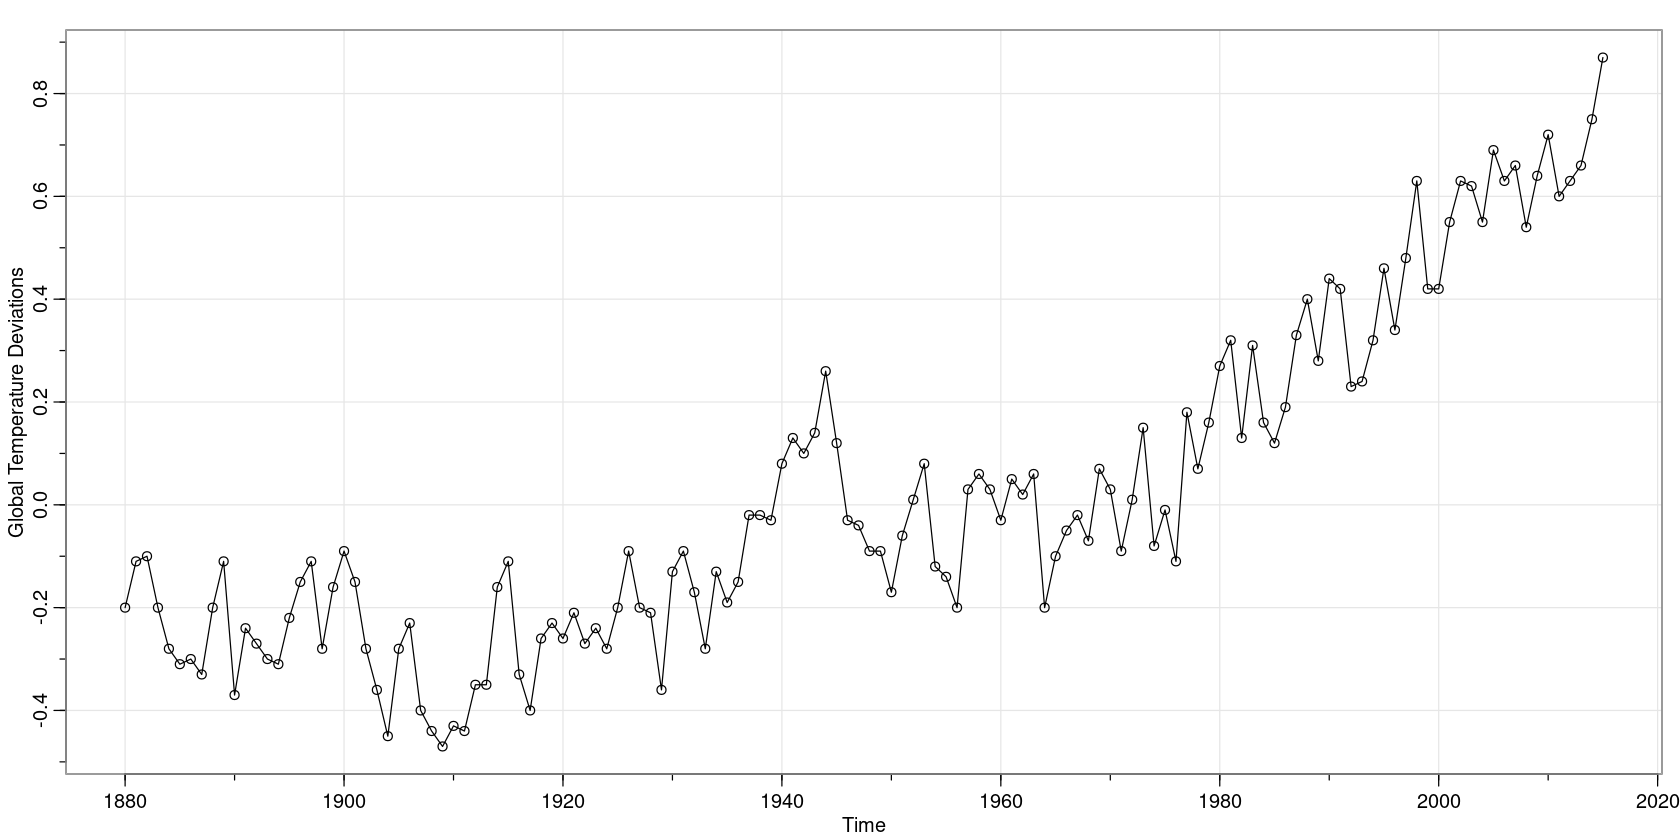

In [3]:
tsplot(globtemp, type="o", ylab="Global Temperature Deviations")

#### Observaciones

* Parece haber una tendencia creciente, comenzando alrededor de 1970.
* ¿Esto confirma el calentamiento global? 
* ¿Qué pasa si miramos escalas más largas de tiempo? 
* ¿Es estadísticamente significativo el cambio?

### Ejemplo 3: Señal acústica

Señal de 1000 muestras ($0.1s$) de audio de la palabra "aaahhh". 

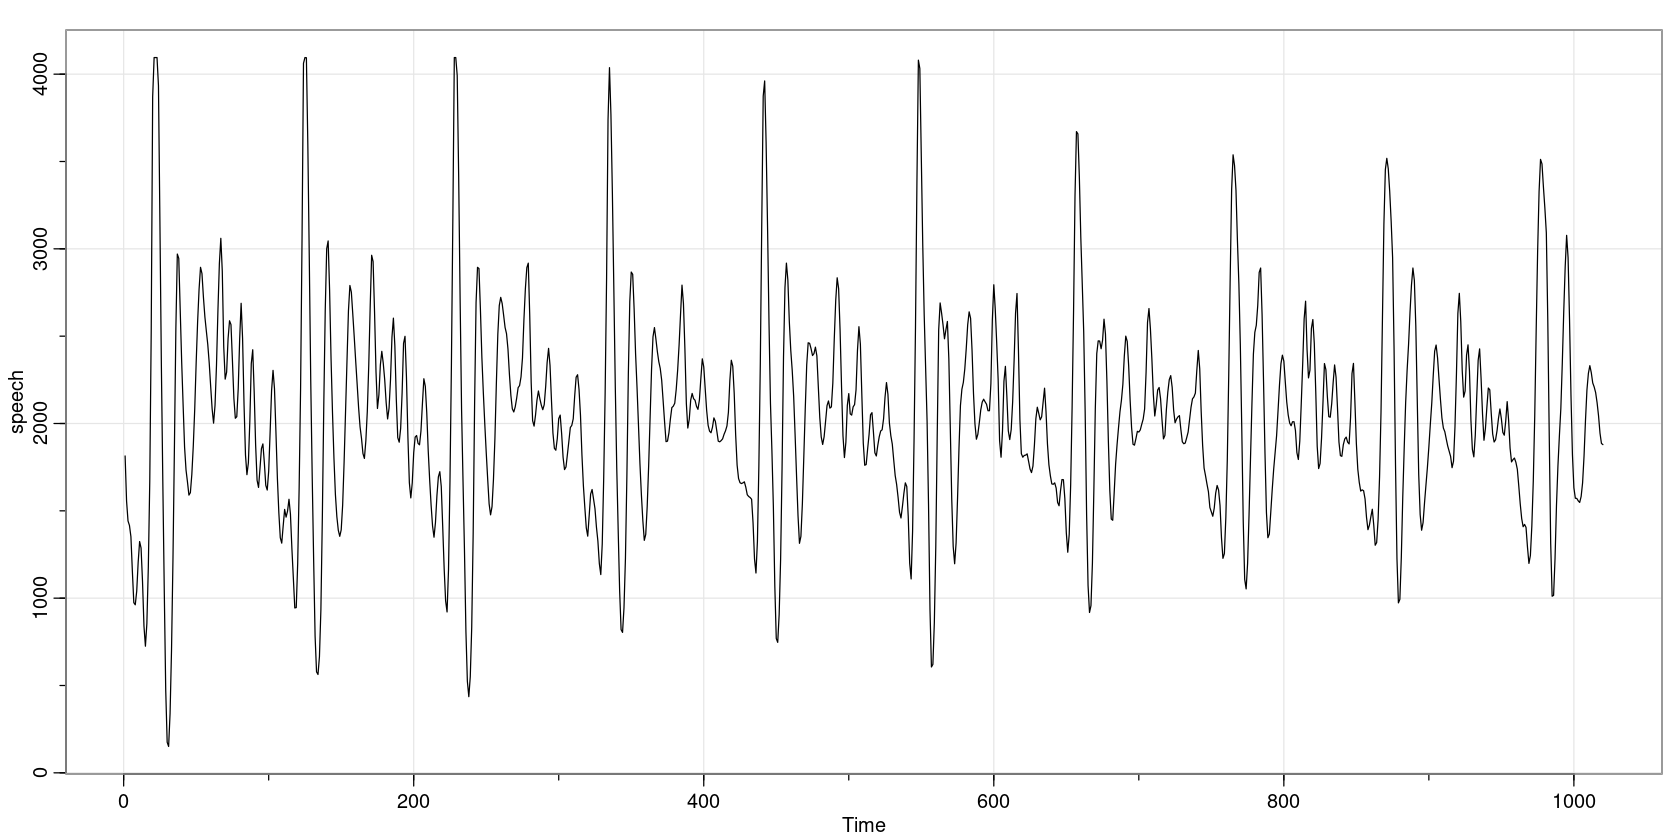

In [4]:
tsplot(speech)  

#### Observaciones

* Señal con periodicidades importantes, debido al funcionamiento físico del sistema (sonido)
* Estacionaria en el tiempo (mantiene las características)
* El problema de interés puede ser *reconocer* qué letra o fonema es el que estamos detectando.

### Ejemplo 4: Dow Jones

Serie de retornos diarios (o cambio porcentual) del índice Dow Jones de 2006 a 2016.

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




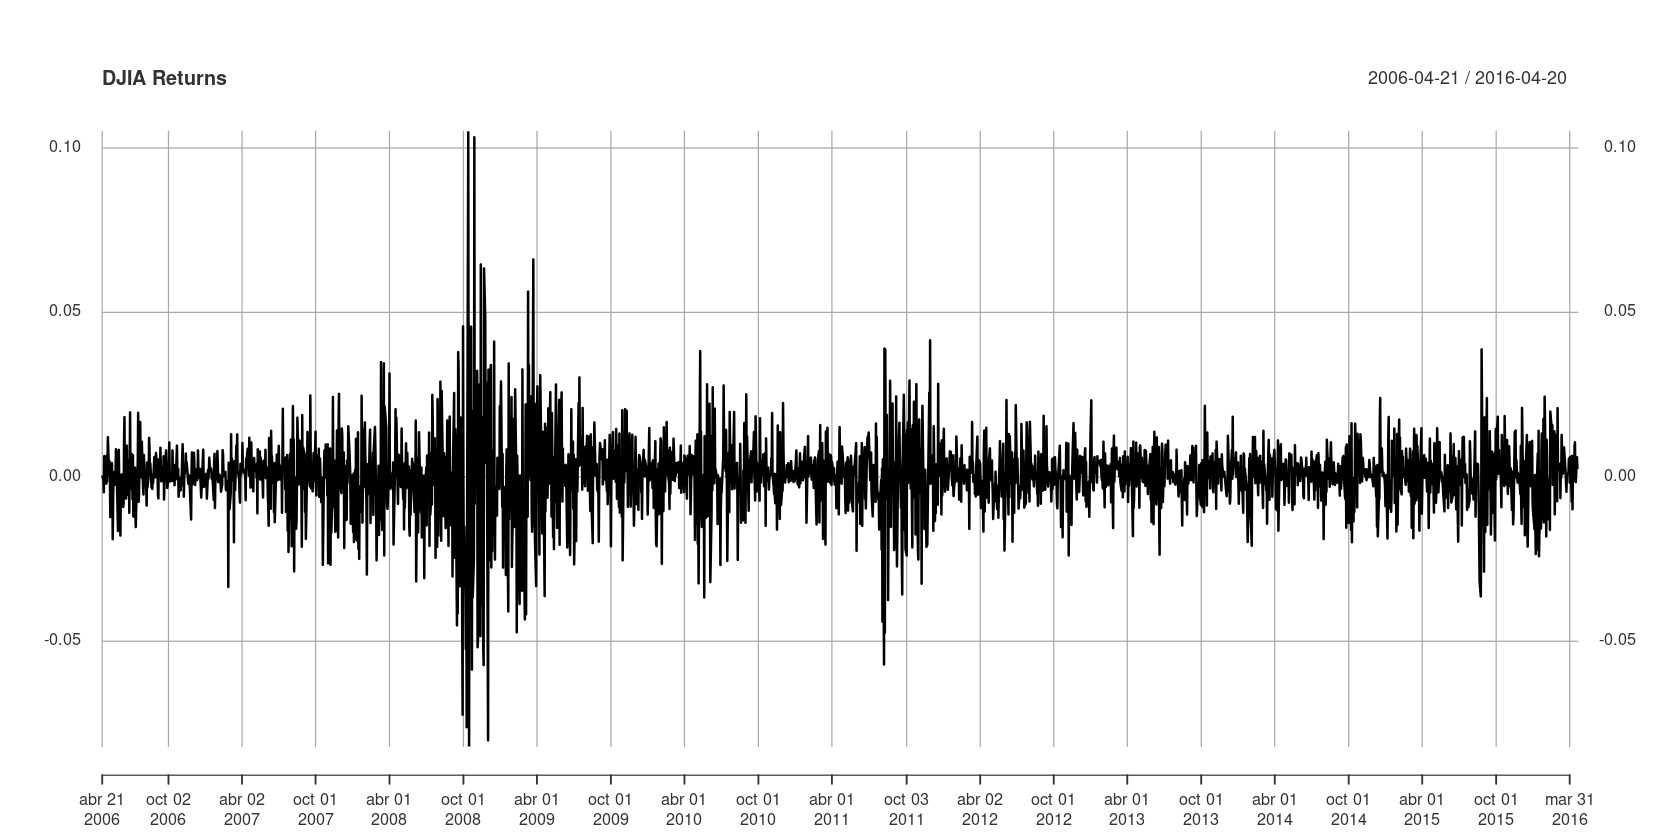

In [5]:
library(xts)                              # Esta biblioteca permite trabajar con fechas
djiar = diff(log(djia$Close))[-1]         # approximate returns
plot(djiar, main="DJIA Returns")  

#### Observaciones:

* Media de retornos estable, alrededor de 0 (es decir poca variación diaria).
* Pero aparecen períodos de alta *volatilidad* (varianza).
* Es de interés predecir este tipo de fenómenos.
* A modo de ejemplo el pico alto corresponde a la crisis financiera de 2008.

### Ejemplo 5:  El niño y sus peces

Este es un ejemplo de *correlación* entre fenómenos. Se tiene la serie de 1950-1987 del Southern Oscillation Index (vinculado a la temperatura del Océano Pacífico) así como a la población de peces (Recruitment)

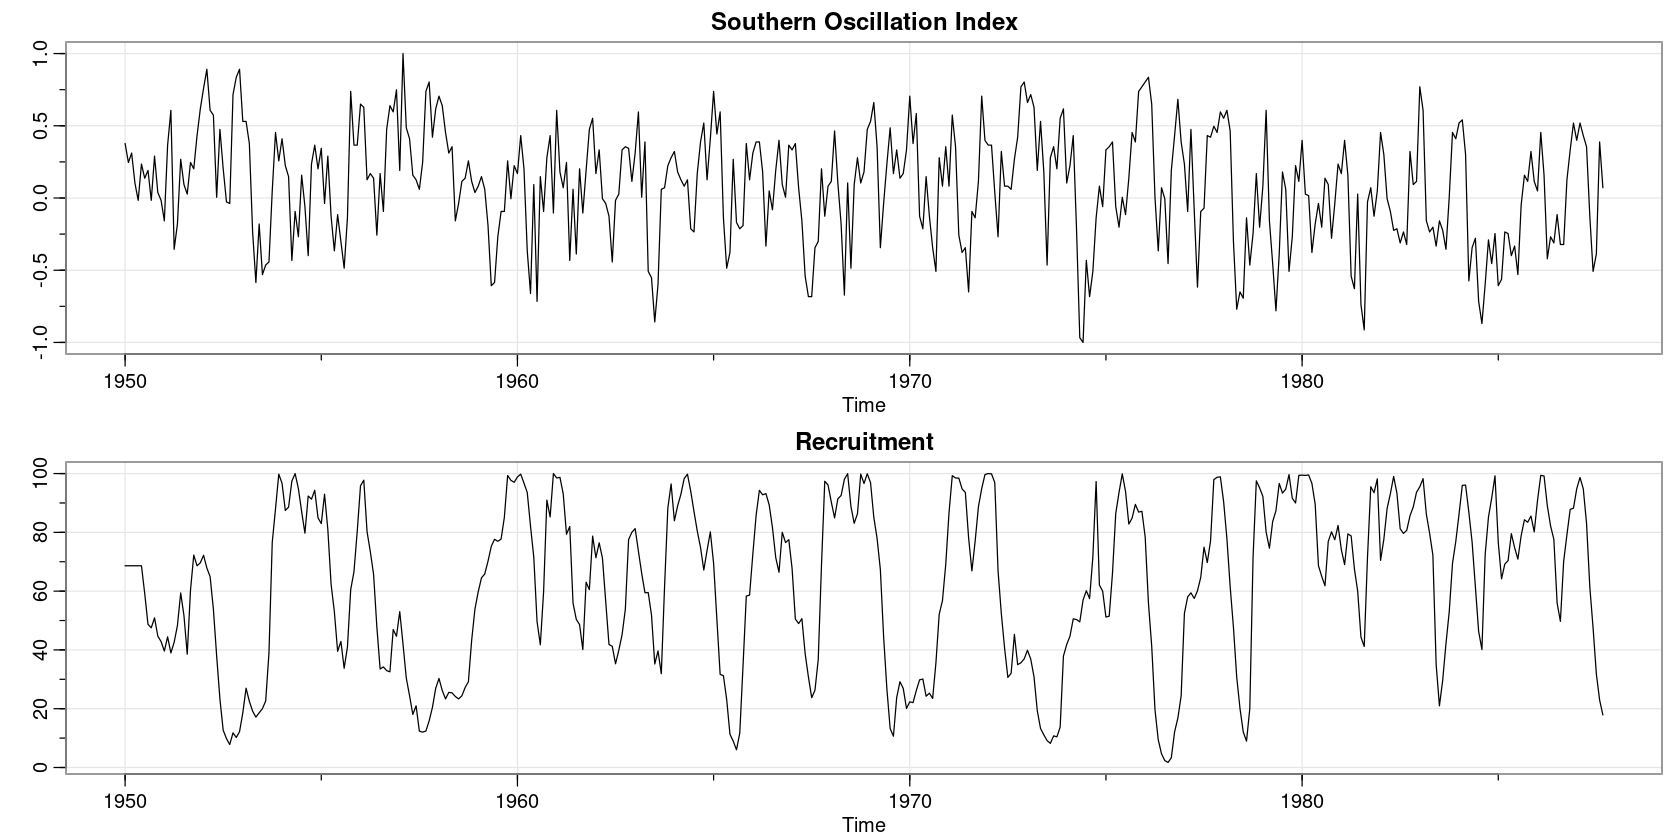

In [6]:
par(mfrow = c(2,1))  # set up the graphics
tsplot(soi, ylab="", main="Southern Oscillation Index")
tsplot(rec, ylab="", main="Recruitment") 

#### Observaciones

* Comportamiento periódico, con ciclos regulares.

* Varios períodos o frecuencias aparecen (por ej. en la 2a. parece haber dos frecuencias de oscilación, una rápida y una lenta.

* Parece haber una correlación entre ambas series (valores altos de SOI llevan a valores bajos de peces).

* ¿Podemos usar una serie para predecir la otra?

### Ejemplo 6: Terremotos y explosiones

Se tienen la serie de datos sismográficos de las ondas $P$ ($t=0\ldots 1000$) y $S$ ($t=1000 \ldots 2000$) correspondientes a un terremoto y una explosión.

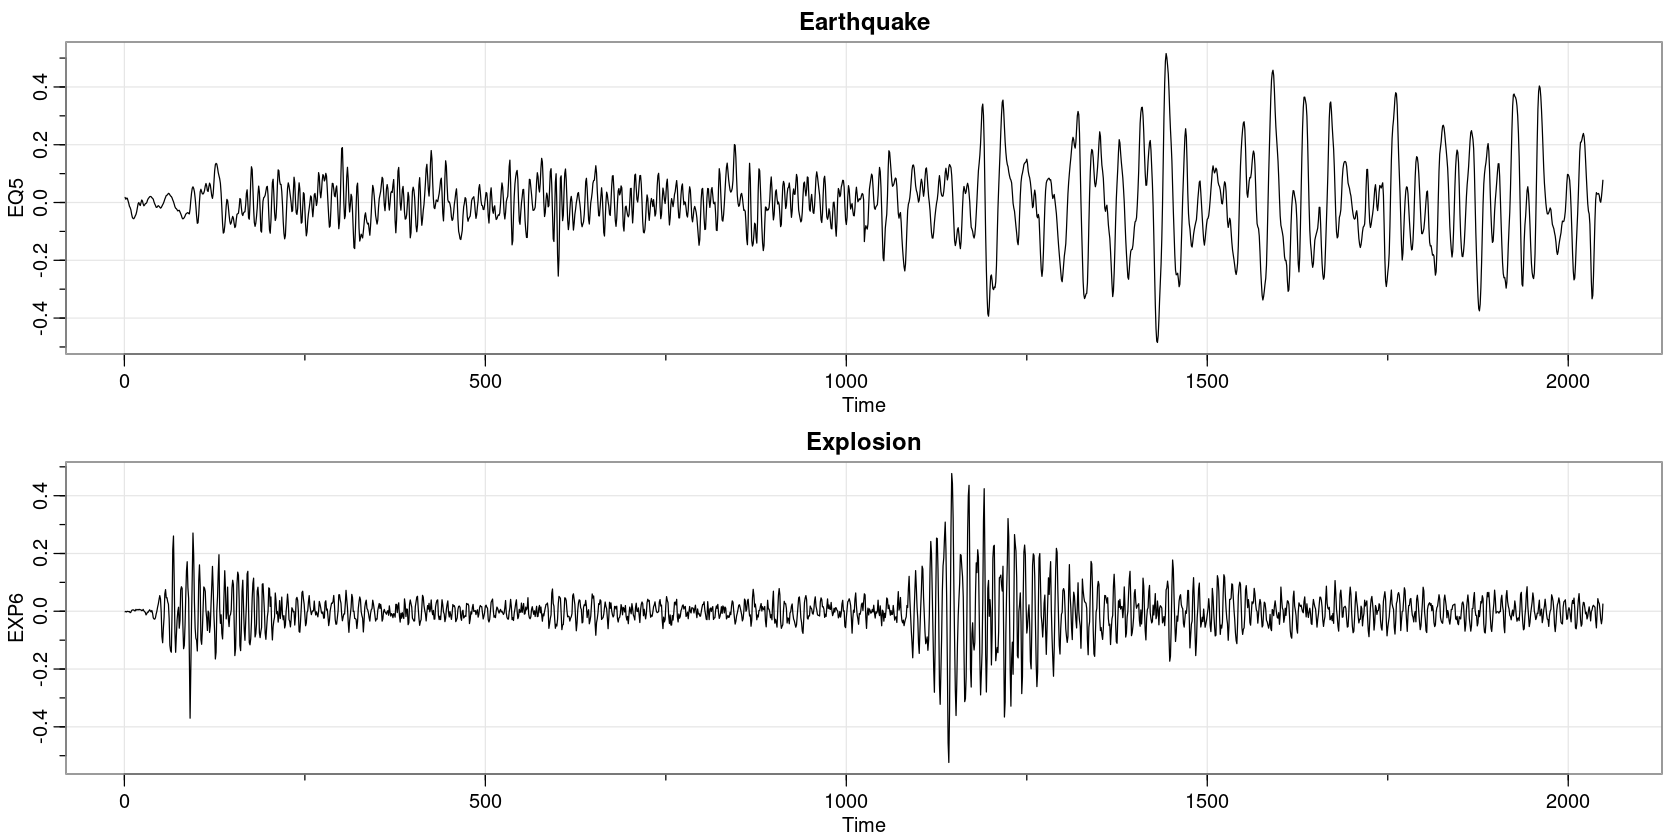

In [7]:
par(mfrow=c(2,1))
tsplot(EQ5, main="Earthquake")
tsplot(EXP6, main="Explosion")

#### Observaciones:

* Claramente las gráficas son distintas "a ojo".

* ¿Podemos entrenar un algoritmo que distinga ambos fenómenos?

* ¿Podemos hacer que lo distinga en tiempo real?

* ¿Podemos clasificar automáticamente las series? ¿Cuáles son las características esenciales?

## Objetivos del curso

* Proveer modelos matemáticos para el análisis de series temporales.

* Fuerte base matemática para modelar los fenómenos más comunes.

* Proveer herramientas básicas para responder las preguntas anteriores.

* Ajuste de modelos, predicción de valores futuros, filtrado y suavizado, etc. etc.